    Abgabe Marquardt 3601760 Data Exploration Project

In [61]:
# imports
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import chi2, f_classif, SelectKBest, RFE

# Datensatz laden
path = "mushrooms.csv"
mushroom_data = pd.read_csv(path)

In [62]:
# Die ersten Zeilen des Datensatzes anzeigen
print(mushroom_data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [63]:
# Die Spaltennamen des Datensatzes anzeigen
print(mushroom_data.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [64]:
X=mushroom_data.drop('class', axis=1) 
y=mushroom_data['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [65]:
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])

Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print(f"Number of samples for training set:{X_train.shape}")
print(f"Number of samples for test set:{X_test.shape}")

Number of samples for training set:(6499, 22)
Number of samples for test set:(1625, 22)


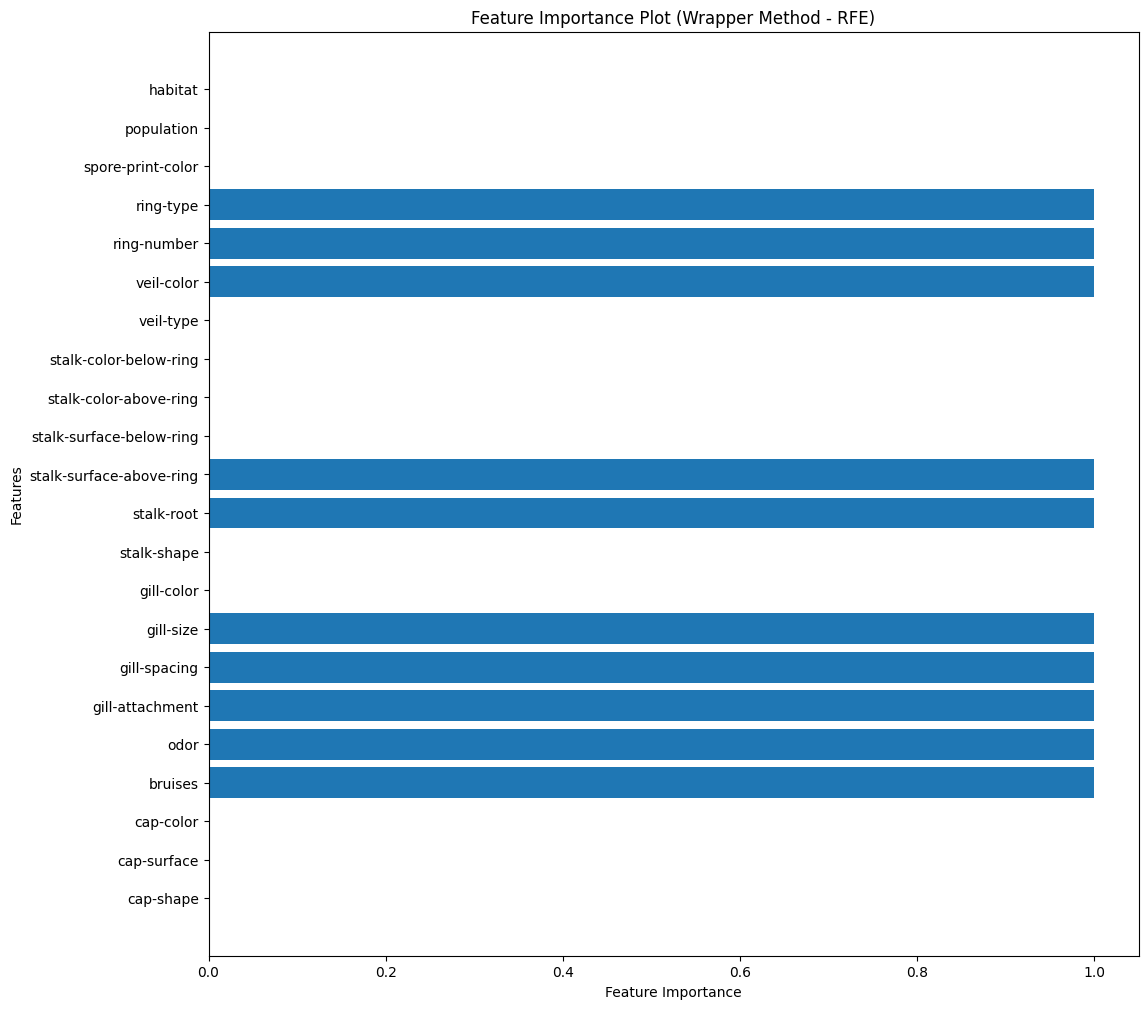

In [66]:
# Plotting feature importance with Recursive Feature Elimination
plt.figure(figsize=(12, 12))
plt.barh(range(len(rfe.support_)), rfe.support_)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot (Wrapper Method - RFE)')
plt.show()

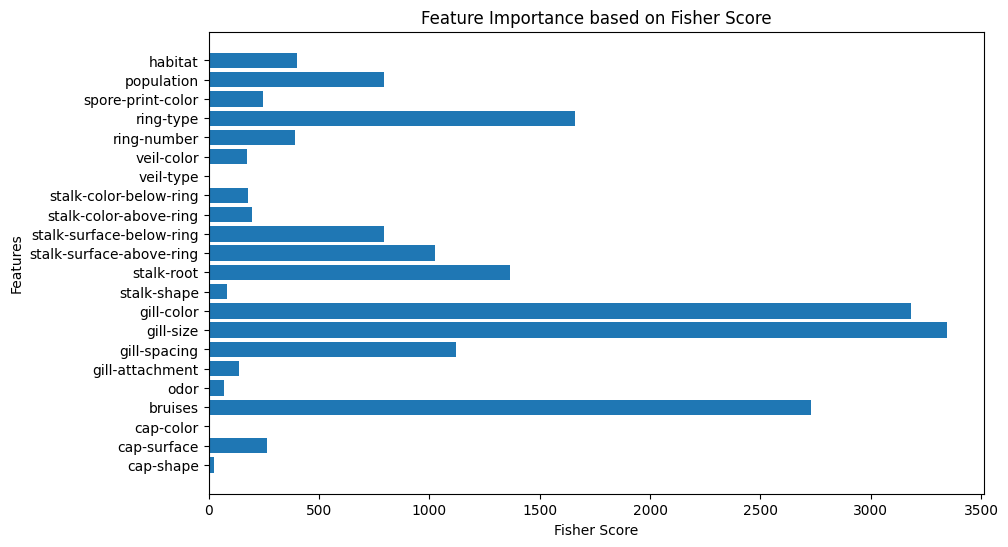

In [67]:
# Plotting Fisher score feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(fisher_scores)), fisher_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Feature Importance based on Fisher Score')
plt.show()

In [68]:
chi2_scores, _ = chi2(X, y)

# Calculate Fisher scores
fisher_scores, _ = f_classif(X, y)

# Get top features based on scores
top_chi2_features = [X.columns[i] for i in np.argsort(chi2_scores)[-10:]]
top_fisher_features = [X.columns[i] for i in np.argsort(fisher_scores)[-10:]]

print("Top 10 features based on chi-square:", top_chi2_features)
print("Top 10 features based on Fisher score:", top_fisher_features)

Top 10 features based on chi-square: ['population', 'spore-print-color', 'habitat', 'gill-spacing', 'stalk-root', 'bruises', 'gill-size', 'ring-type', 'gill-color', 'veil-type']
Top 10 features based on Fisher score: ['population', 'stalk-surface-below-ring', 'stalk-surface-above-ring', 'gill-spacing', 'stalk-root', 'ring-type', 'bruises', 'gill-color', 'gill-size', 'veil-type']


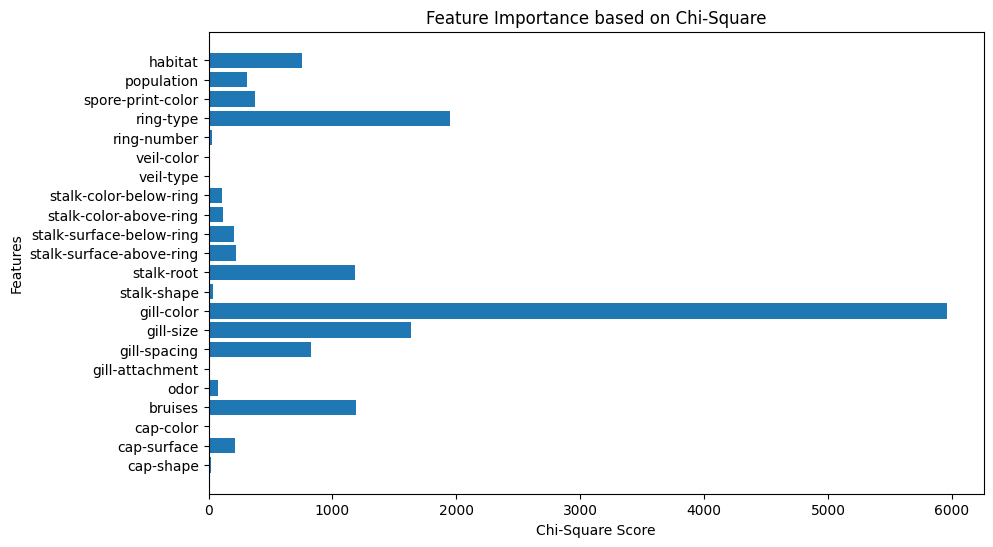

In [69]:
# Plotting chi-square feature importance 
plt.figure(figsize=(10, 6))
plt.barh(range(len(chi2_scores)), chi2_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Feature Importance based on Chi-Square')
plt.show()

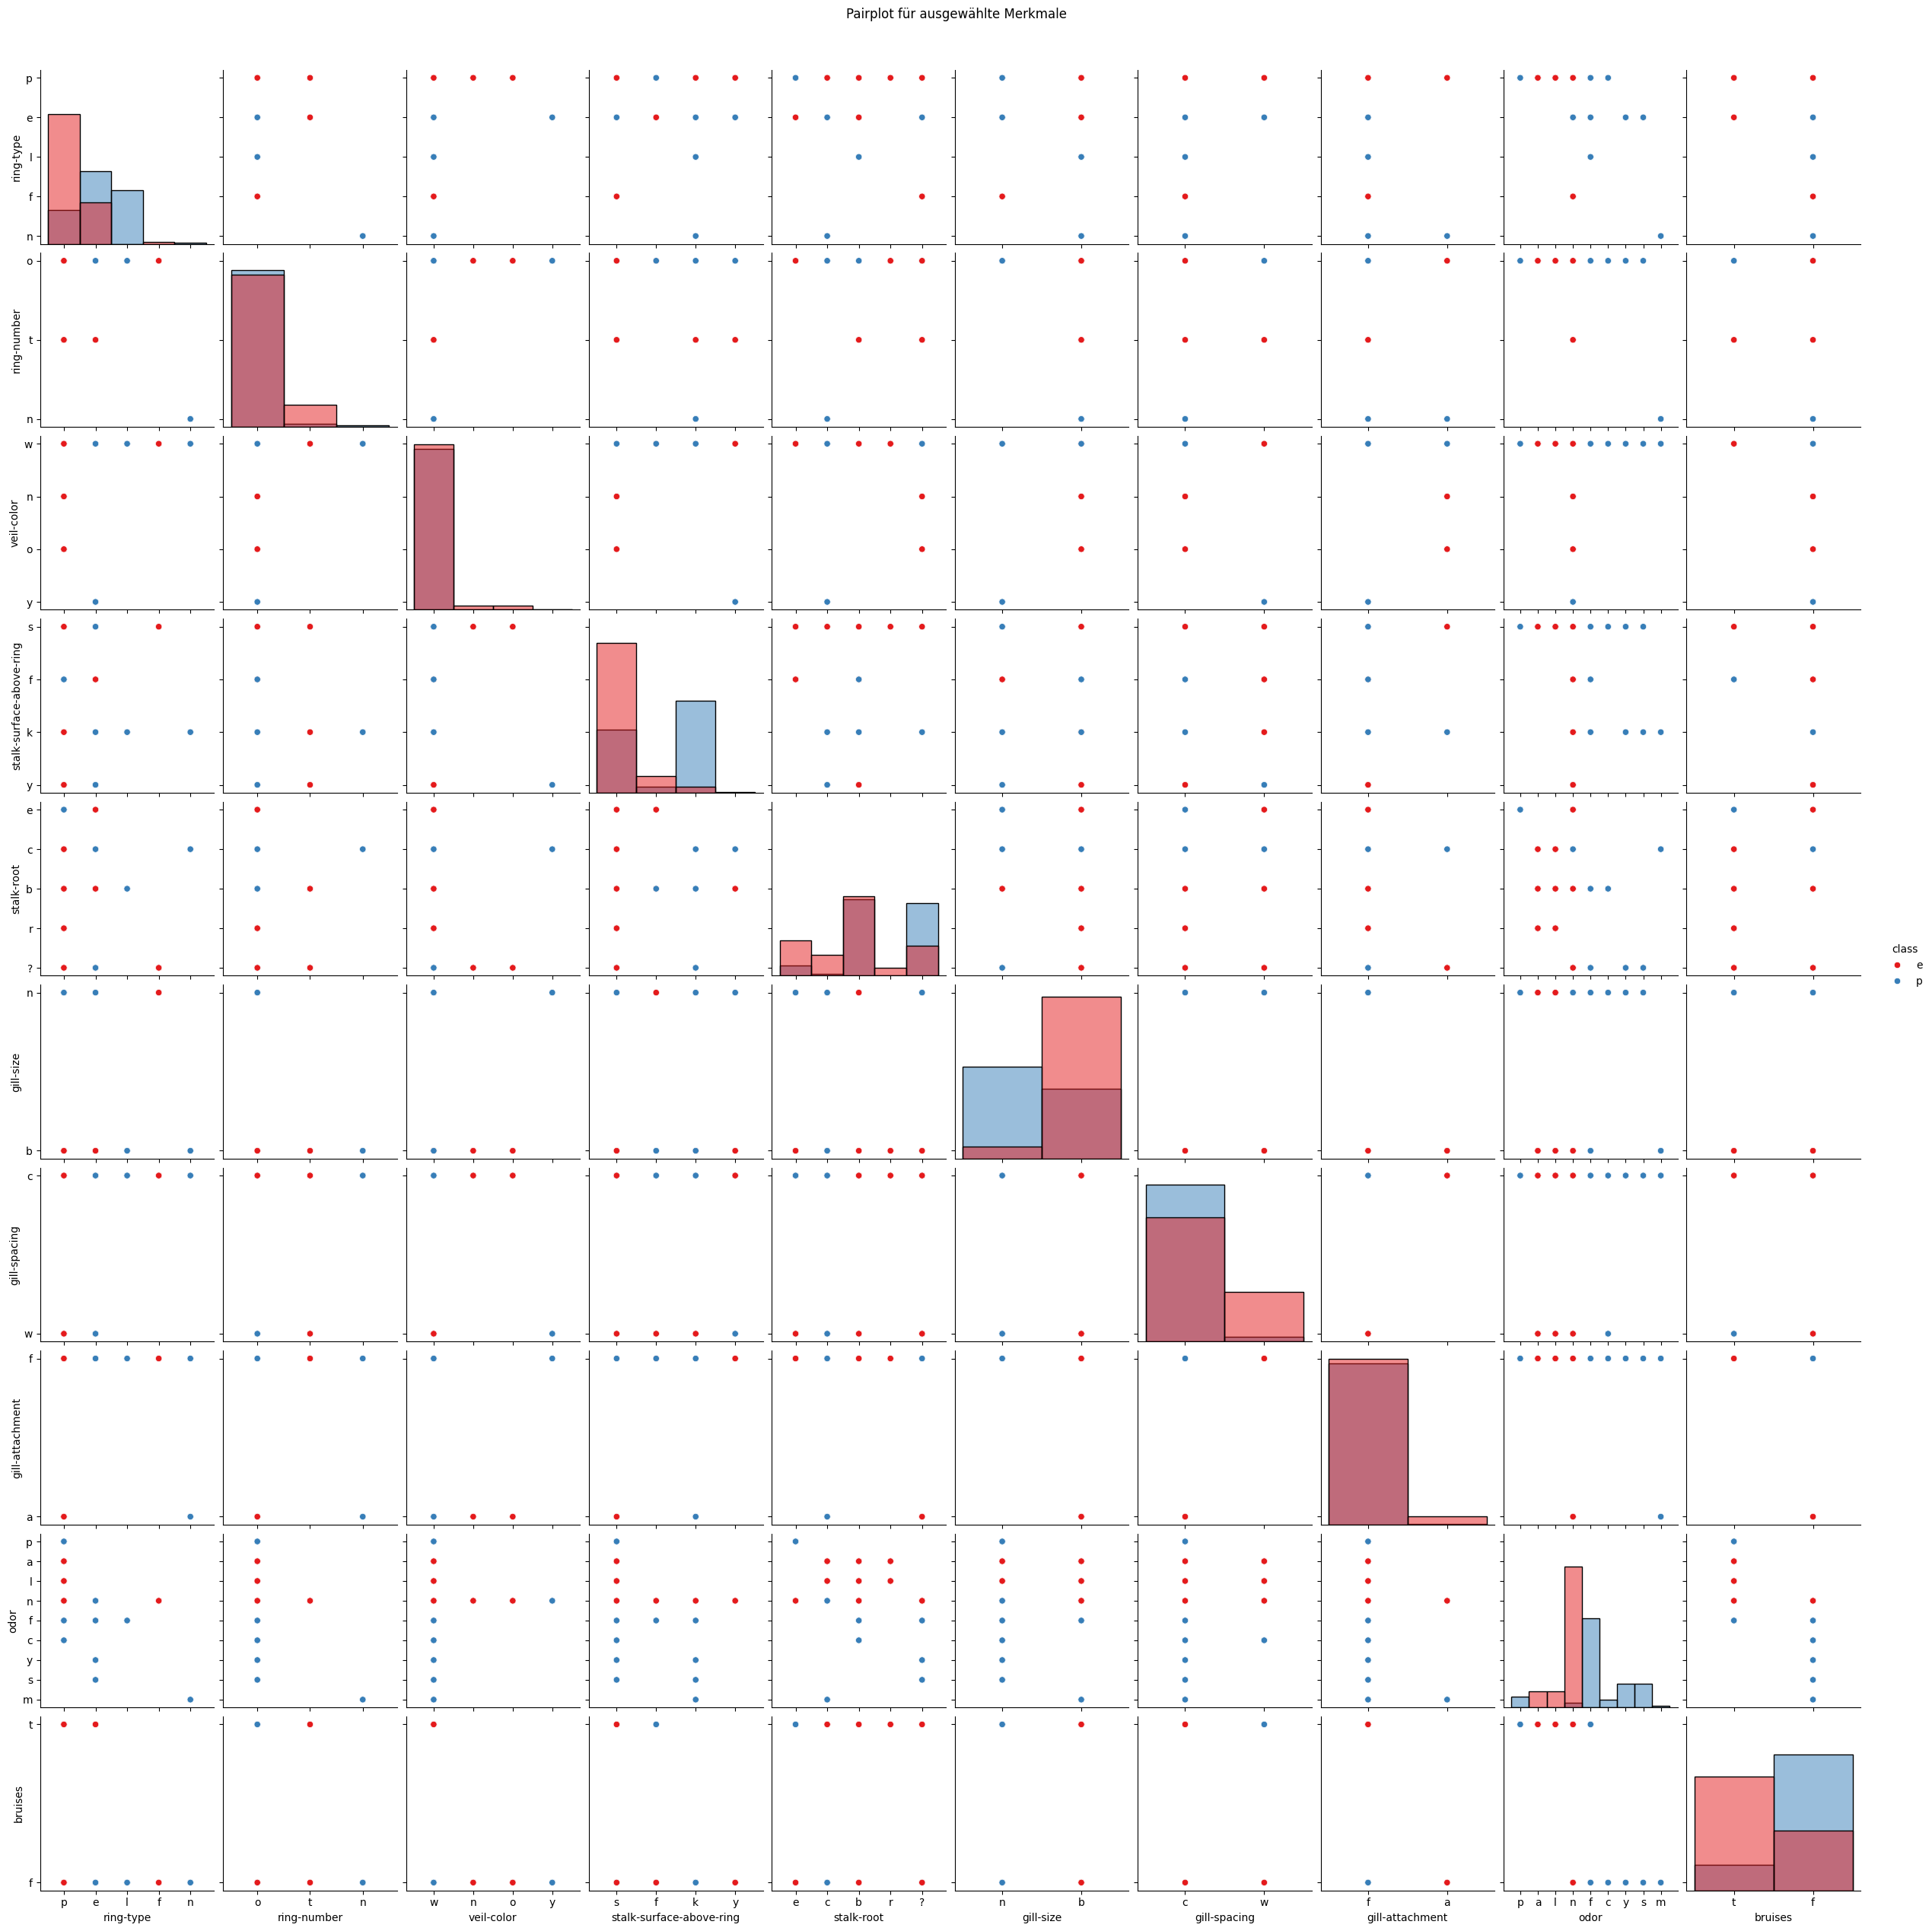

In [76]:
# Paarplot für alle Merkmale
selected_features = ['ring-type', 'ring-number', 'veil-color', 'stalk-surface-above-ring', 'stalk-root',
       'gill-size', 'gill-spacing', 'gill-attachment', 'odor', 'bruises']

# Stelle sicher, dass 'class' eine kategoriale Variable ist
mushroom_data['class'] = mushroom_data['class'].astype('category')

# Färbe die Punkte entsprechend der Zielklasse ein
sns.pairplot(data=mushroom_data, vars=selected_features, hue='class', palette='Set1', diag_kind='hist')

plt.suptitle('Pairplot für ausgewählte Merkmale', y=1.02)
plt.show()

In [71]:
logreg = LogisticRegression()

# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=logreg, n_features_to_select=10, step=1)
rfe.fit(X_train, Y_train)

selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected Features:", selected_features)

Selected Features: Index(['bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'stalk-root', 'stalk-surface-above-ring', 'veil-color', 'ring-number',
       'ring-type'],
      dtype='object')


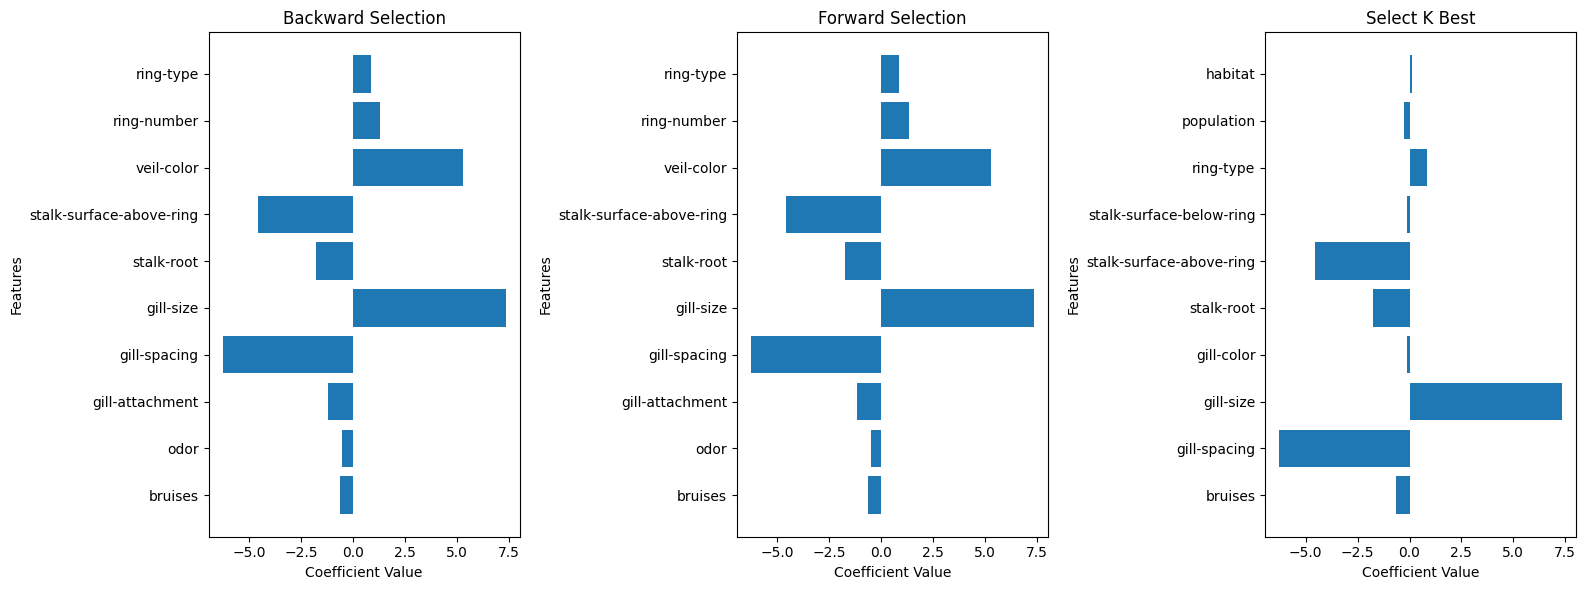

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Backward Selection using RFE
selector_backward = RFE(estimator=logreg, n_features_to_select=10, step=1)
X_backward_selected = selector_backward.fit_transform(X, y)
backward_selected_features = X.columns[selector_backward.support_]

# Forward Selection using RFE
selector_forward = RFE(estimator=logreg, n_features_to_select=10, step=1)
X_forward_selected = selector_forward.fit_transform(X, y)
forward_selected_features = X.columns[selector_forward.support_]

# Select K Best Features
selector_k_best = SelectKBest(score_func=f_classif, k=10)
X_k_best_selected = selector_k_best.fit_transform(X, y)
k_best_selected_features = X.columns[selector_k_best.get_support()]

# Plotting
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.barh(range(len(backward_selected_features)), logreg.coef_[0][selector_backward.support_])
plt.yticks(range(len(backward_selected_features)), backward_selected_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Backward Selection')

plt.subplot(1, 3, 2)
plt.barh(range(len(forward_selected_features)), logreg.coef_[0][selector_forward.support_])
plt.yticks(range(len(forward_selected_features)), forward_selected_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Forward Selection')

plt.subplot(1, 3, 3)
plt.barh(range(len(k_best_selected_features)), logreg.coef_[0][selector_k_best.get_support()])
plt.yticks(range(len(k_best_selected_features)), k_best_selected_features)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Select K Best')

plt.tight_layout()
plt.show()

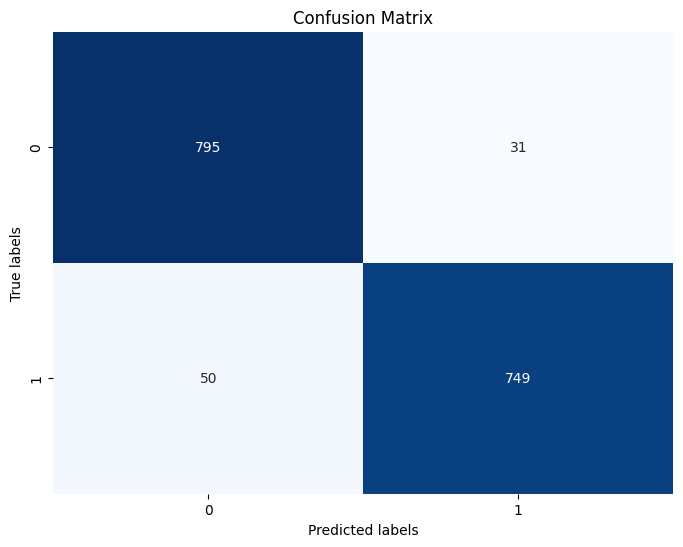

In [73]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()